In [9]:
import pandas as pd

# 1. Load the dataset
df1 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-01-2021 to 31-01-2021.csv.crdownload')
df2 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-02-2021 to 28-02-2021.csv.crdownload')
df3 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-03-2021 to 31-03-2021.csv.crdownload')
df4 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-04-2021 to 30-04-2021.csv')
df5 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-05-2021 to 31-05-2021.csv')
df6 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-06-2021 to 30-06-2021.csv')
df7 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-07-2021 to 31-07-2021.csv')
df8 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-08-2021 to 31-08-2021.csv')
df9 = pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-09-2021 to 30-09-2021.csv')
df10 =pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-10-2021 to 31-10-2021.csv')
df11 =pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-11-2021 to 30-11-2021.csv')
df12 =pd.read_csv('D:/Internship/Cloudthat/Project/Raw Dataset/Transport Vehicle Online Sales Data 01-12-2021 to 31-12-2021.csv')

In [10]:
# Merge them together
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9 ,df10, df11, df12], ignore_index=True)

In [11]:
print(df.info())       # Check column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455106 entries, 0 to 1455105
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   slno                    1455106 non-null  int64 
 1   modelDesc               1455106 non-null  object
 2   fuel                    1413139 non-null  object
 3   colour                  1455104 non-null  object
 4   vehicleClass            1455106 non-null  object
 5   makeYear                1455106 non-null  object
 6   seatCapacity            1455106 non-null  int64 
 7   secondVehicle           1455106 non-null  object
 8   tempRegistrationNumber  1455105 non-null  object
 9   category                1455105 non-null  object
 10  makerName               1455105 non-null  object
 11  OfficeCd                1455104 non-null  object
 12  fromdate                1455103 non-null  object
 13  todate                  1455103 non-null  object
dtypes: int64(2), objec

In [12]:
# Summary statistics
print(df.describe())

# Data types
print(df.dtypes)

               slno  seatCapacity
count  1.455106e+06  1.455106e+06
mean   5.196487e+06  2.498186e+00
std    3.008588e+06  1.561428e+00
min    6.000000e+00  0.000000e+00
25%    2.588026e+06  2.000000e+00
50%    5.189791e+06  2.000000e+00
75%    7.796126e+06  2.000000e+00
max    1.075007e+07  6.000000e+01
slno                       int64
modelDesc                 object
fuel                      object
colour                    object
vehicleClass              object
makeYear                  object
seatCapacity               int64
secondVehicle             object
tempRegistrationNumber    object
category                  object
makerName                 object
OfficeCd                  object
fromdate                  object
todate                    object
dtype: object


# Address inconsistencies

In [13]:
# Check for missing values
print(df.isnull().sum())

slno                          0
modelDesc                     0
fuel                      41967
colour                        2
vehicleClass                  0
makeYear                      0
seatCapacity                  0
secondVehicle                 0
tempRegistrationNumber        1
category                      1
makerName                     1
OfficeCd                      2
fromdate                      3
todate                        3
dtype: int64


In [14]:
# Fill missing data
df['fuel'] = df['fuel'].fillna('Unknown')
df['tempRegistrationNumber'] = df['tempRegistrationNumber'].str.strip().str.upper().fillna('NA')
df['colour'] = df['colour'].str.strip().str.lower().fillna('NA')
df['category'] = df['category'].fillna('NA')
df['makerName'] = df['makerName'].fillna('NA')
df['OfficeCd'] = df['OfficeCd'].fillna('Unknown')
df['fromdate'] = df['fromdate'].fillna('NA')
df['todate'] = df['todate'].fillna('NA')

# Convert object into datetime format

In [15]:
# Convert makeYear,fromdate,todate to datetime format
df['makeYear'] = pd.to_datetime(df['makeYear'], errors='coerce', dayfirst=True)
df['fromdate'] = pd.to_datetime(df['fromdate'], errors='coerce', dayfirst=True)
df['todate'] = pd.to_datetime(df['todate'], errors='coerce', dayfirst=True)

In [16]:
print(df.dtypes)

slno                               int64
modelDesc                         object
fuel                              object
colour                            object
vehicleClass                      object
makeYear                  datetime64[ns]
seatCapacity                       int64
secondVehicle                     object
tempRegistrationNumber            object
category                          object
makerName                         object
OfficeCd                          object
fromdate                  datetime64[ns]
todate                    datetime64[ns]
dtype: object


In [17]:
#how many invalid dates--
print(df['makeYear'].isna().sum())
print(df['fromdate'].isna().sum())
print(df['todate'].isna().sum())

0
3
3


# commercial vs private

In [18]:
commercial_vehicles = [
    'Articulated Vehicles', 'Chassis Transport', 'Goods Carriage', 'Loader', 'Maxi Cab',
    'Motor Cab', 'Motor Cycle for Hire', 'Ominibus', 'Self Loading Concrete Mixer',
    'SELF PROPELLED HARVESTER', 'Three Wheeled Goods Vehicle', 'Tractor for Commercial Use',
    'Trailer For Commercial Use', 'Vehicle Fitted with Construction Equipment', 'Auto Rickshaw'
]

# Categorize into 'Commercial' or 'Private'
# Define a function
def classify_usage_type(vehicle_class):
    if vehicle_class in commercial_vehicles:
        return 'Commercial'
    else:
        return 'Private'

# Apply this function to the DataFrame
df['usage_type'] = df['vehicleClass'].apply(classify_usage_type)

In [19]:
print(df['usage_type'].value_counts())

usage_type
Private       1334724
Commercial     120382
Name: count, dtype: int64


# Ev vs Traditional

In [20]:
# Clean and categorize fuel types
def categorize_fuel(fuel):
    fuel = str(fuel).strip().lower()
    
    if fuel == 'battery':
        return 'EV'
    elif fuel in ['petrol','cng petrol','petrol lpg', 'diesel', 'cng', 'lpg']:
        return 'Traditional'
    else:
        return 'Other'

# Apply the function
df['fuel_type_group'] = df['fuel'].apply(categorize_fuel)

In [21]:
print(df['fuel_type_group'].value_counts())

fuel_type_group
Traditional    1394464
Other            42414
EV               18228
Name: count, dtype: int64


# Visualization

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# 1. Frequency Tables and Summary Statistics (vehicle age, etc.)

In [23]:
from datetime import datetime

# Compute vehicle age
df['vehicle_age'] = 2025 - df['makeYear'].dt.year

# Compute registration duration (in days)
df['registration_duration'] = (df['todate'] - df['fromdate']).dt.days


In [24]:
# Summary for vehicle_age
print("Vehicle Age Stats:")
print(df['vehicle_age'].describe())

# Mode and Median
print("Median:", df['vehicle_age'].median())
print("Mode:", df['vehicle_age'].mode()[0])

# Frequency table for vehicleClass and fuel
freq_table = pd.crosstab(df['vehicleClass'], df['fuel'])
print("\nVehicle Class vs Fuel Type Frequency Table:")
print(freq_table)

Vehicle Age Stats:
count    1.455106e+06
mean     4.107577e+00
std      3.163036e-01
min      4.000000e+00
25%      4.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      4.700000e+01
Name: vehicle_age, dtype: float64
Median: 4.0
Mode: 4

Vehicle Class vs Fuel Type Frequency Table:
fuel                                         -1  BATTERY  CNG  CNG PETROL  \
vehicleClass                                                                
Ambulance                                     0        0    0           0   
Articulated Vehicles                          0        0    0           0   
Auto Rickshaw                                 0      152  179        1944   
Auto Rikckshaw Private                        0        0    2           4   
Chassis Transport                             0        0   59           0   
Crane For Private Use                         0        0    0           0   
Fork Lift                                     0        0    0           0   
Goods Carriag

# 2. Top 10 Vehicle Makers

C:\Users\Priya\AppData\Local\Temp\ipykernel_13464\441311076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makers.values, y=top_makers.index, palette='viridis')


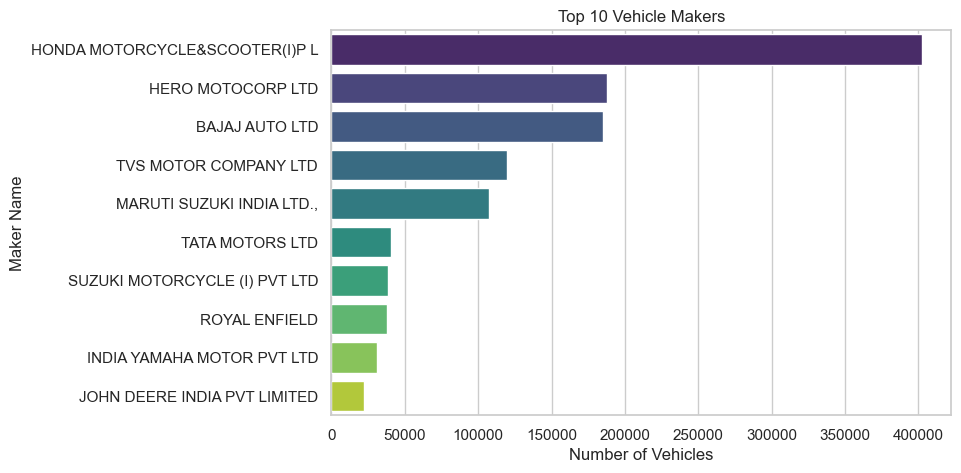

In [25]:
top_makers = df['makerName'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_makers.values, y=top_makers.index, palette='viridis')
plt.title('Top 10 Vehicle Makers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Maker Name')
plt.show()

# 3. Trendline Visualizations (Monthly Registrations)

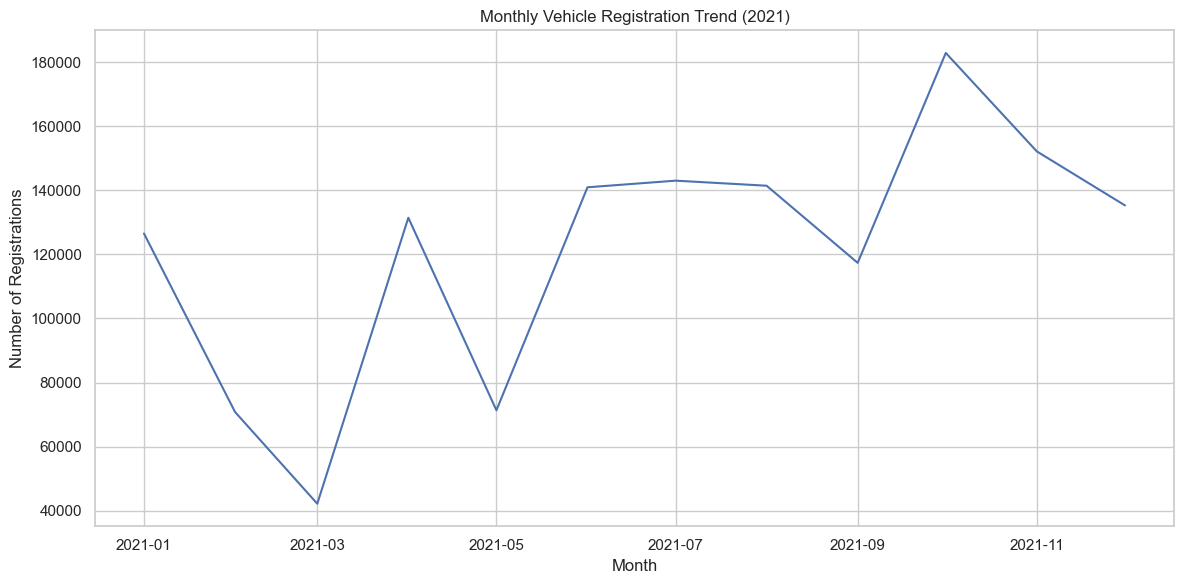

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a year-month column
df['year_month'] = df['fromdate'].dt.to_period('M')
monthly_reg = df.groupby('year_month').size()
monthly_reg.index = monthly_reg.index.to_timestamp()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_reg.index, y=monthly_reg.values)
plt.title("Monthly Vehicle Registration Trend (2021)")
plt.xlabel("Month")
plt.ylabel("Number of Registrations")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Top Brand-Wise Fuel Preference Over Time

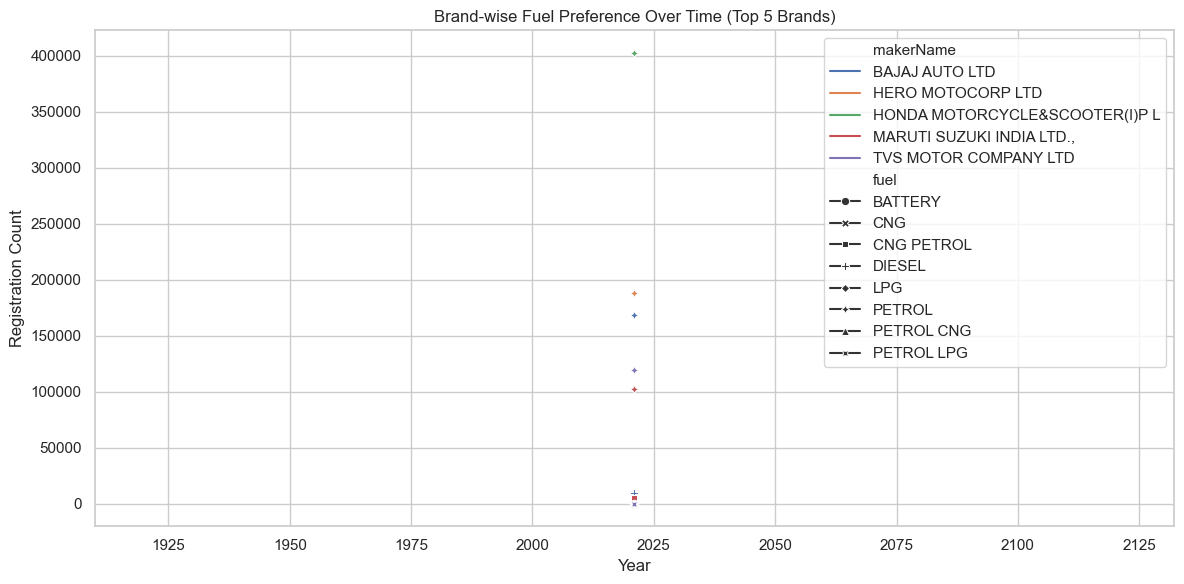

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract Year from 'fromdate'
df['year'] = df['fromdate'].dt.year

# Step 2: Get top 5 brands by total registrations
top_brands = df['makerName'].value_counts().head(5).index

# Step 3: Filter dataset to only top 5 brands
df_top = df[df['makerName'].isin(top_brands)]

# Step 4: Group by year, brand, and fuel, and count
grouped = df_top.groupby(['year', 'makerName', 'fuel']).size().reset_index(name='count')

# Step 5: Plot with points using lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year', y='count', hue='makerName', style='fuel', markers=True, dashes=False)

plt.title("Brand-wise Fuel Preference Over Time (Top 5 Brands)")
plt.xlabel("Year")
plt.ylabel("Registration Count")
plt.grid(True)
plt.tight_layout()
plt.show()

#Useful to analyze EV adoption across brands.
#Each line shows how a specific brand's fuel type registrations changed over time.

# 5. Fuel Type Distribution Overall

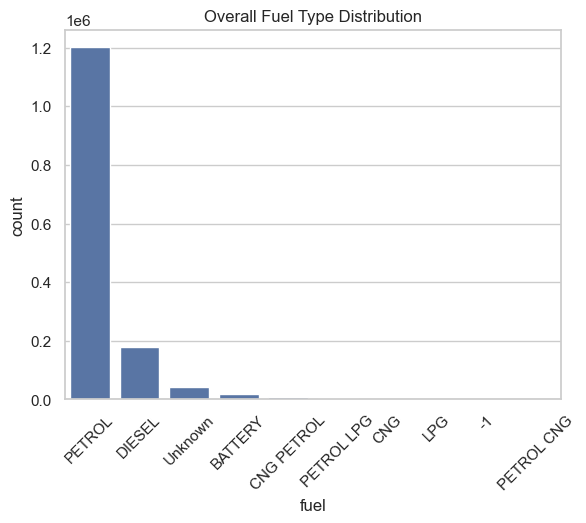

In [28]:
sns.countplot(x='fuel', data=df, order=df['fuel'].value_counts().index)
plt.title("Overall Fuel Type Distribution")
plt.xticks(rotation=45)
plt.show()

#Which fuel type dominates overall

# 6. Vehicle Class Count

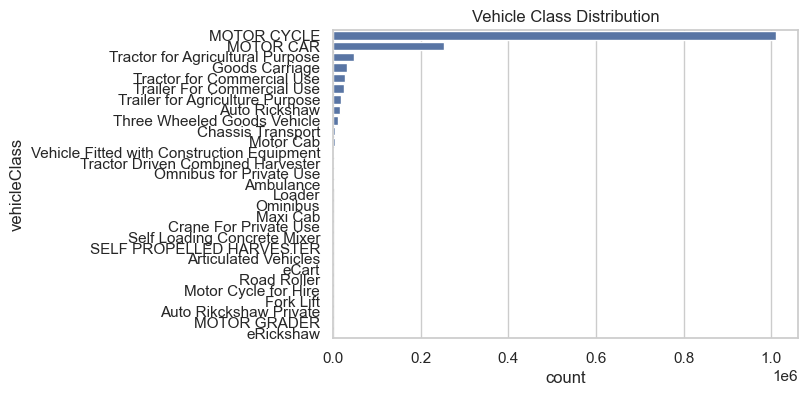

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(y='vehicleClass', data=df, order=df['vehicleClass'].value_counts().index)
plt.title('Vehicle Class Distribution')
plt.show()

# 7. Vehicle Class vs Fuel Type

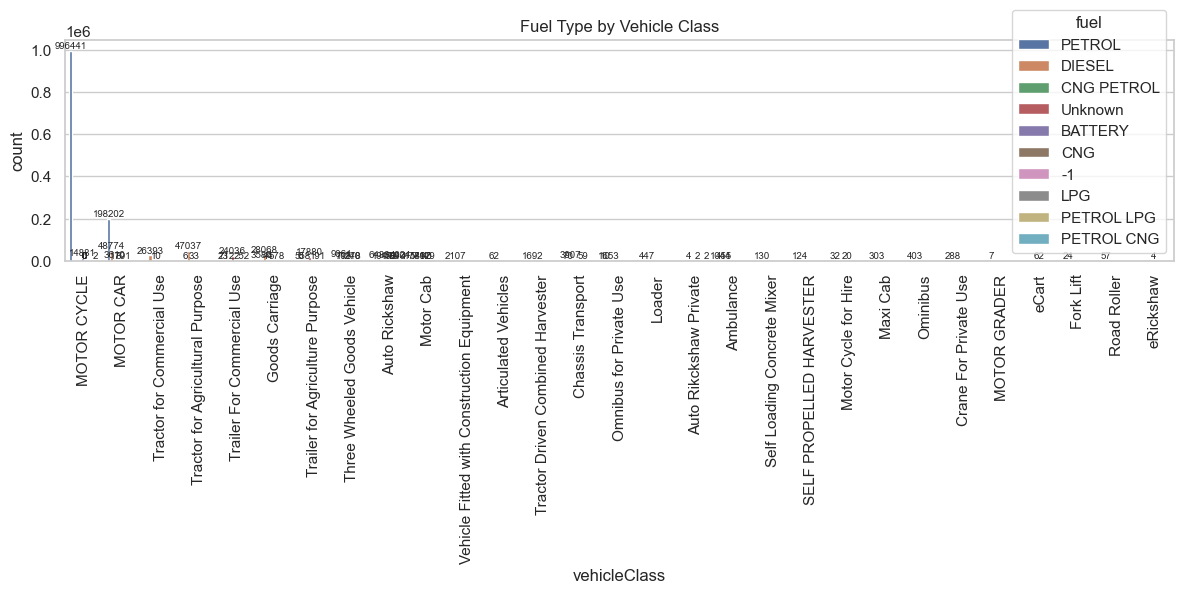

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='vehicleClass', hue='fuel', data=df)
plt.title("Fuel Type by Vehicle Class")
plt.xticks(rotation=90)
plt.tight_layout()

# Add value labels with upward shift to avoid overlap
for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 3, count, ha='center', va='bottom', fontsize=7)  # Shift up by 3

plt.show()

#What fuel is used in private vs commercial

# 8. Vehicle Age vs Fuel Type

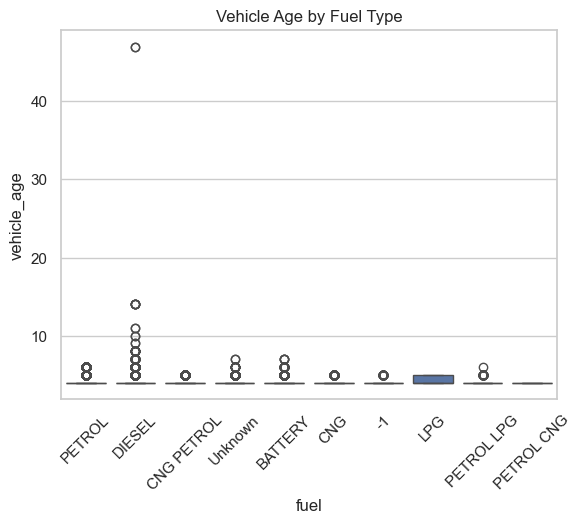

In [31]:
sns.boxplot(x='fuel', y='vehicle_age', data=df)
plt.title("Vehicle Age by Fuel Type")
plt.xticks(rotation=45)
plt.show()

# 9. Top Vehicle Models Registered

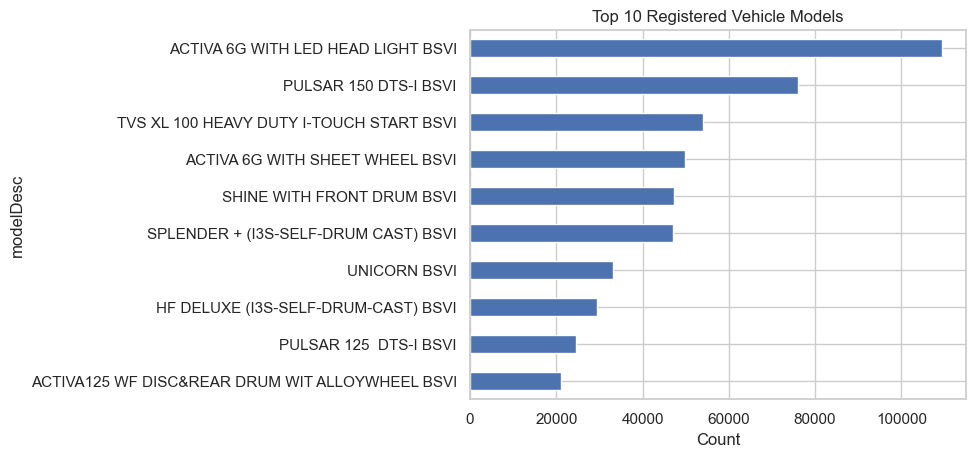

In [32]:
df['modelDesc'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Registered Vehicle Models")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

#What models are most common

# 10. Monthly Seasonality Heatmap

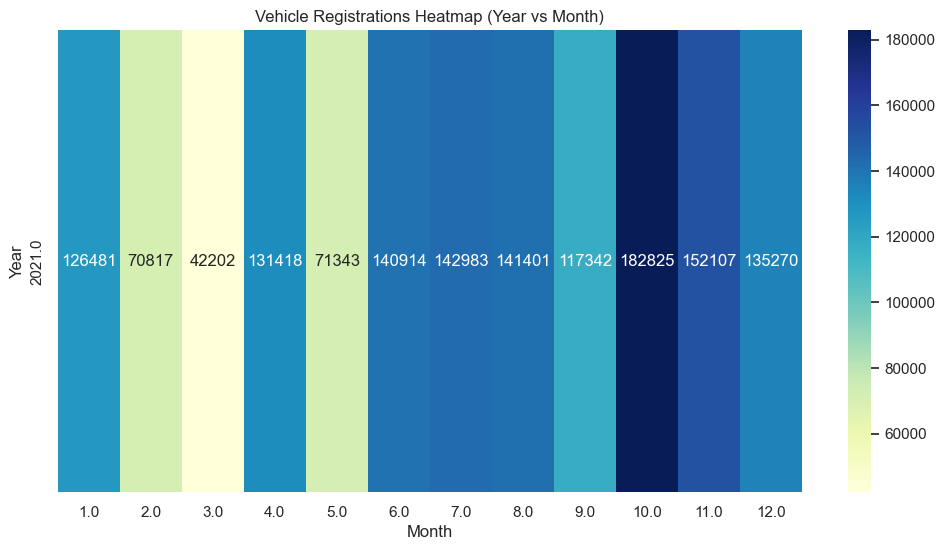

In [33]:
df['month'] = df['fromdate'].dt.month
heatmap_data = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Vehicle Registrations Heatmap (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

#When (month/year) do people register most
#lowest in march because of incometax maybe
#highest in oct because of diwali.

In [35]:
df.rename(columns={'year_month': 'Month_of_the_year'}, inplace=True)

In [36]:
# Convert 'day', 'month', and 'year' to integers (if not already)
df['month'] = pd.to_numeric(df['month'], errors='coerce').astype('Int64')
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')

In [37]:
print(df.dtypes)

slno                               int64
modelDesc                         object
fuel                              object
colour                            object
vehicleClass                      object
makeYear                  datetime64[ns]
seatCapacity                       int64
secondVehicle                     object
tempRegistrationNumber            object
category                          object
makerName                         object
OfficeCd                          object
fromdate                  datetime64[ns]
todate                    datetime64[ns]
usage_type                        object
fuel_type_group                   object
vehicle_age                        int32
registration_duration            float64
Month_of_the_year              period[M]
year                               Int64
month                              Int64
dtype: object


In [38]:
# Save cleaned DataFrame as CSV
df.to_csv("D:/Internship/Cloudthat/Project/Coverted data/vehicle_data_cleaned.csv", index=False)